In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.multivariate.manova import MANOVA
print("All packages are imported")

All packages are imported


In [2]:
# Load dataset
data = pd.read_csv('machine_failure_data.csv')

In [3]:
data.head()

Machine_ID  Usage_Hours  Failures
0  Machine_1          910         0
1  Machine_2         3822         1
2  Machine_3         3142         1
3  Machine_4          516         0
4  Machine_5         4476         1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Machine_ID   1000 non-null   object
 1   Usage_Hours  1000 non-null   int64 
 2   Failures     1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


In [5]:
data['Failure_Status'] = data['Failures'].apply(lambda x: 'No Failure' if x ==0 else 'Failure')

In [6]:
# Usage Hour
bins = [0, 1000, 3000, 5000]
labels = ['Low Usage', 'Medium Usage', 'High Usage']
data['Usage_Category'] = pd.cut(data['Usage_Hours'], bins=bins, labels=labels)

In [7]:
# Define model
model = ols('Failures ~ C(Usage_Category)', data=data).fit()
#ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                       sum_sq     df         F    PR(>F)
C(Usage_Category)    4.117851    2.0  8.366507  0.000249
Residual           245.353149  997.0       NaN       NaN


In [8]:
# Define MANOVA
manova = MANOVA.from_formula('Usage_Hours + Failures ~ Failure_Status', data=data)
print(manova.mv_test())

                                  Multivariate linear model
                                                                                             
---------------------------------------------------------------------------------------------
       Intercept                Value         Num DF  Den DF          F Value          Pr > F
---------------------------------------------------------------------------------------------
          Wilks' lambda                0.0000 2.0000 997.0000 1122522207122095616.0000 0.0000
         Pillai's trace                1.0000 2.0000 997.0000 1122522207122095616.0000 0.0000
 Hotelling-Lawley trace 2251799813685247.0000 2.0000 997.0000 1122522207122095488.0000 0.0000
    Roy's greatest root 2251799813685247.0000 2.0000 997.0000 1122522207122095616.0000 0.0000
---------------------------------------------------------------------------------------------
                                                                                             


In [9]:
# Summary of USage_Hours and Failures
print(data[['Usage_Hours', 'Failures']].describe())

       Usage_Hours     Failures
count  1000.000000  1000.000000
mean   2578.250000     0.523000
std    1390.960625     0.499721
min      53.000000     0.000000
25%    1389.500000     0.000000
50%    2647.000000     1.000000
75%    3693.250000     1.000000
max    4998.000000     1.000000


AttributeError: module 'matplotlib' has no attribute 'title'

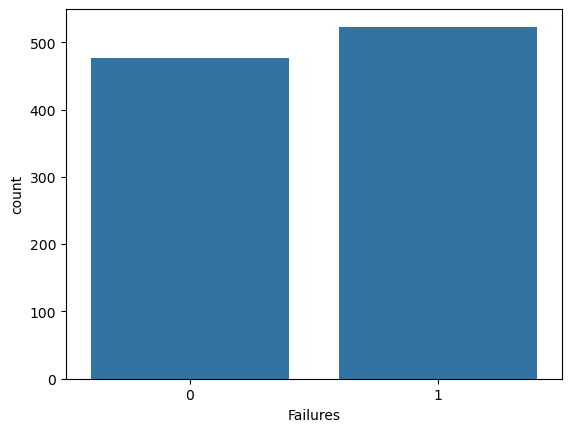

In [10]:
# Failures among machine
sns.countplot(x='Failures', data=data)
plt.title('Prediction of Failures')
plt.show()

In [11]:
# Independent And Dependent Variables
x = data['Usage_Hours']
y = data['Failures']

In [12]:
# Regression model
model = smf.ols(y, x).fit()

PatsyError: model is missing required outcome variables

In [13]:
#Summary
print(model.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x000002715B79B940>>
